Área estimada con 1000 puntos: 196750.0


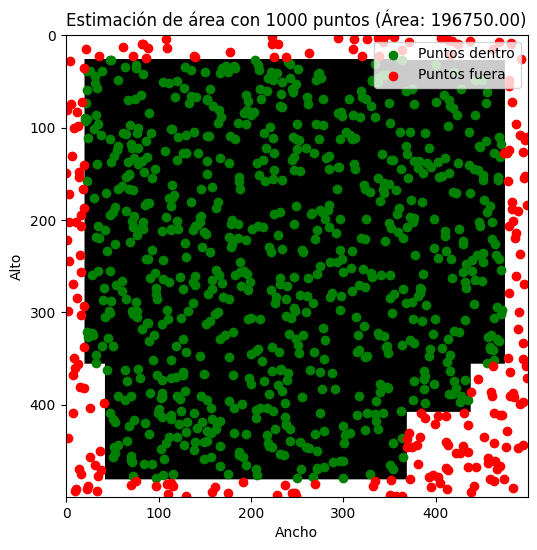

Área estimada con 100 puntos: 197500.0


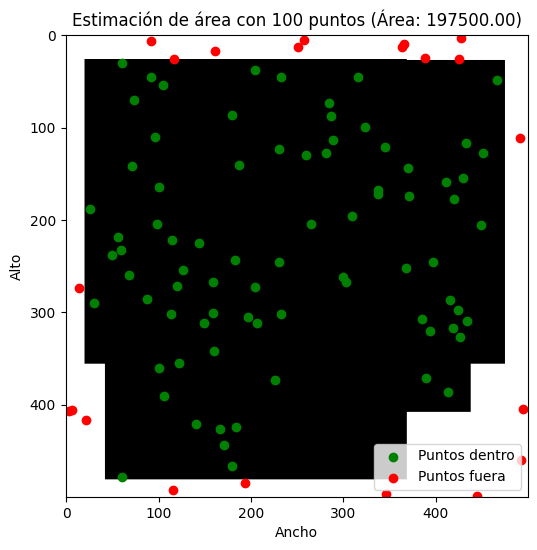

Área estimada con 10 puntos: 150000.0


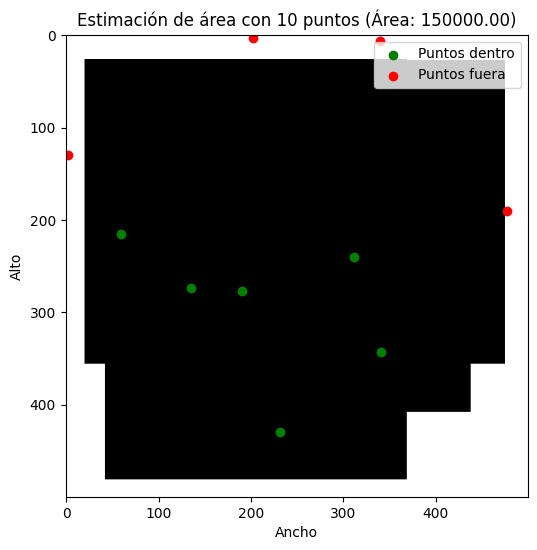

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

ruta_imagen = '/workspaces/Sistema-de-ALumividrios/mancha.png'

try:
    imagen = Image.open(ruta_imagen).convert('L')
    ancho, alto = imagen.size
except FileNotFoundError:
    print(f"Error: No se encontró la imagen en la ruta '{ruta_imagen}'.")
    exit()

def calcular_area_mancha(n_puntos):
    puntos_x = np.random.randint(0, ancho, n_puntos)
    puntos_y = np.random.randint(0, alto, n_puntos)

    p_dentro = sum(1 for x, y in zip(puntos_x, puntos_y) if imagen.getpixel((x, y)) < 128)
    area_estimada = (p_dentro / n_puntos) * (ancho * alto)
    return area_estimada, puntos_x[np.array([imagen.getpixel((x,y)) < 128 for x,y in zip(puntos_x, puntos_y)])], puntos_x[np.array([imagen.getpixel((x,y)) >= 128 for x,y in zip(puntos_x, puntos_y)])], puntos_y[np.array([imagen.getpixel((x,y)) < 128 for x,y in zip(puntos_x, puntos_y)])], puntos_y[np.array([imagen.getpixel((x,y)) >= 128 for x,y in zip(puntos_x, puntos_y)])]


n_puntos_lista = [1000, 100, 10]

for n_puntos in n_puntos_lista:
  area_estimada, px_dentro, px_fuera, py_dentro, py_fuera = calcular_area_mancha(n_puntos)
  print(f"Área estimada con {n_puntos} puntos: {area_estimada}")

  plt.figure(figsize=(6, 6))
  plt.imshow(imagen, cmap='gray')
  plt.scatter(px_dentro, py_dentro, color='green', label='Puntos dentro')
  plt.scatter(px_fuera, py_fuera, color='red', label='Puntos fuera')
  plt.title(f"Estimación de área con {n_puntos} puntos (Área: {area_estimada:.2f})")
  plt.xlabel("Ancho")
  plt.ylabel("Alto")
  plt.legend()
  plt.show()
